# Selenium을 이용한 이미지 크롤링
- 유투브 영상을 이미지로 크롤링
- 특정 영역(Element) 자르기
    - pillow : python을 이용해서 이미지를 전처리해주는 대표적인 패키지
    - `pip install pillow`
    -  `conda install -c anaconda pillow`
- 유튜브 영상 데이터를 다운로드
- fake_useragent 사용법
- headless 설정 : 
    - 브라우져를 화면에 띄우지 않고 RAM 영역에만 띄워서 사용하는 방법
    - 서버에서 selenium을 이용해서 크롤링할 때 사용

In [18]:
import requests
import pandas as pd
from selenium import webdriver
from PIL import Image as pil

## 1. 이미지 스크린샷

In [19]:
url = "https://www.youtube.com/watch?v=7gKtNC3b_S8&ab_channel=%EA%B9%80%EB%B2%84%EA%B7%B8Kimbug"
driver = webdriver.Chrome()
driver.get(url)

In [20]:
driver.save_screenshot("datas/screenshot.png")
driver.quit()

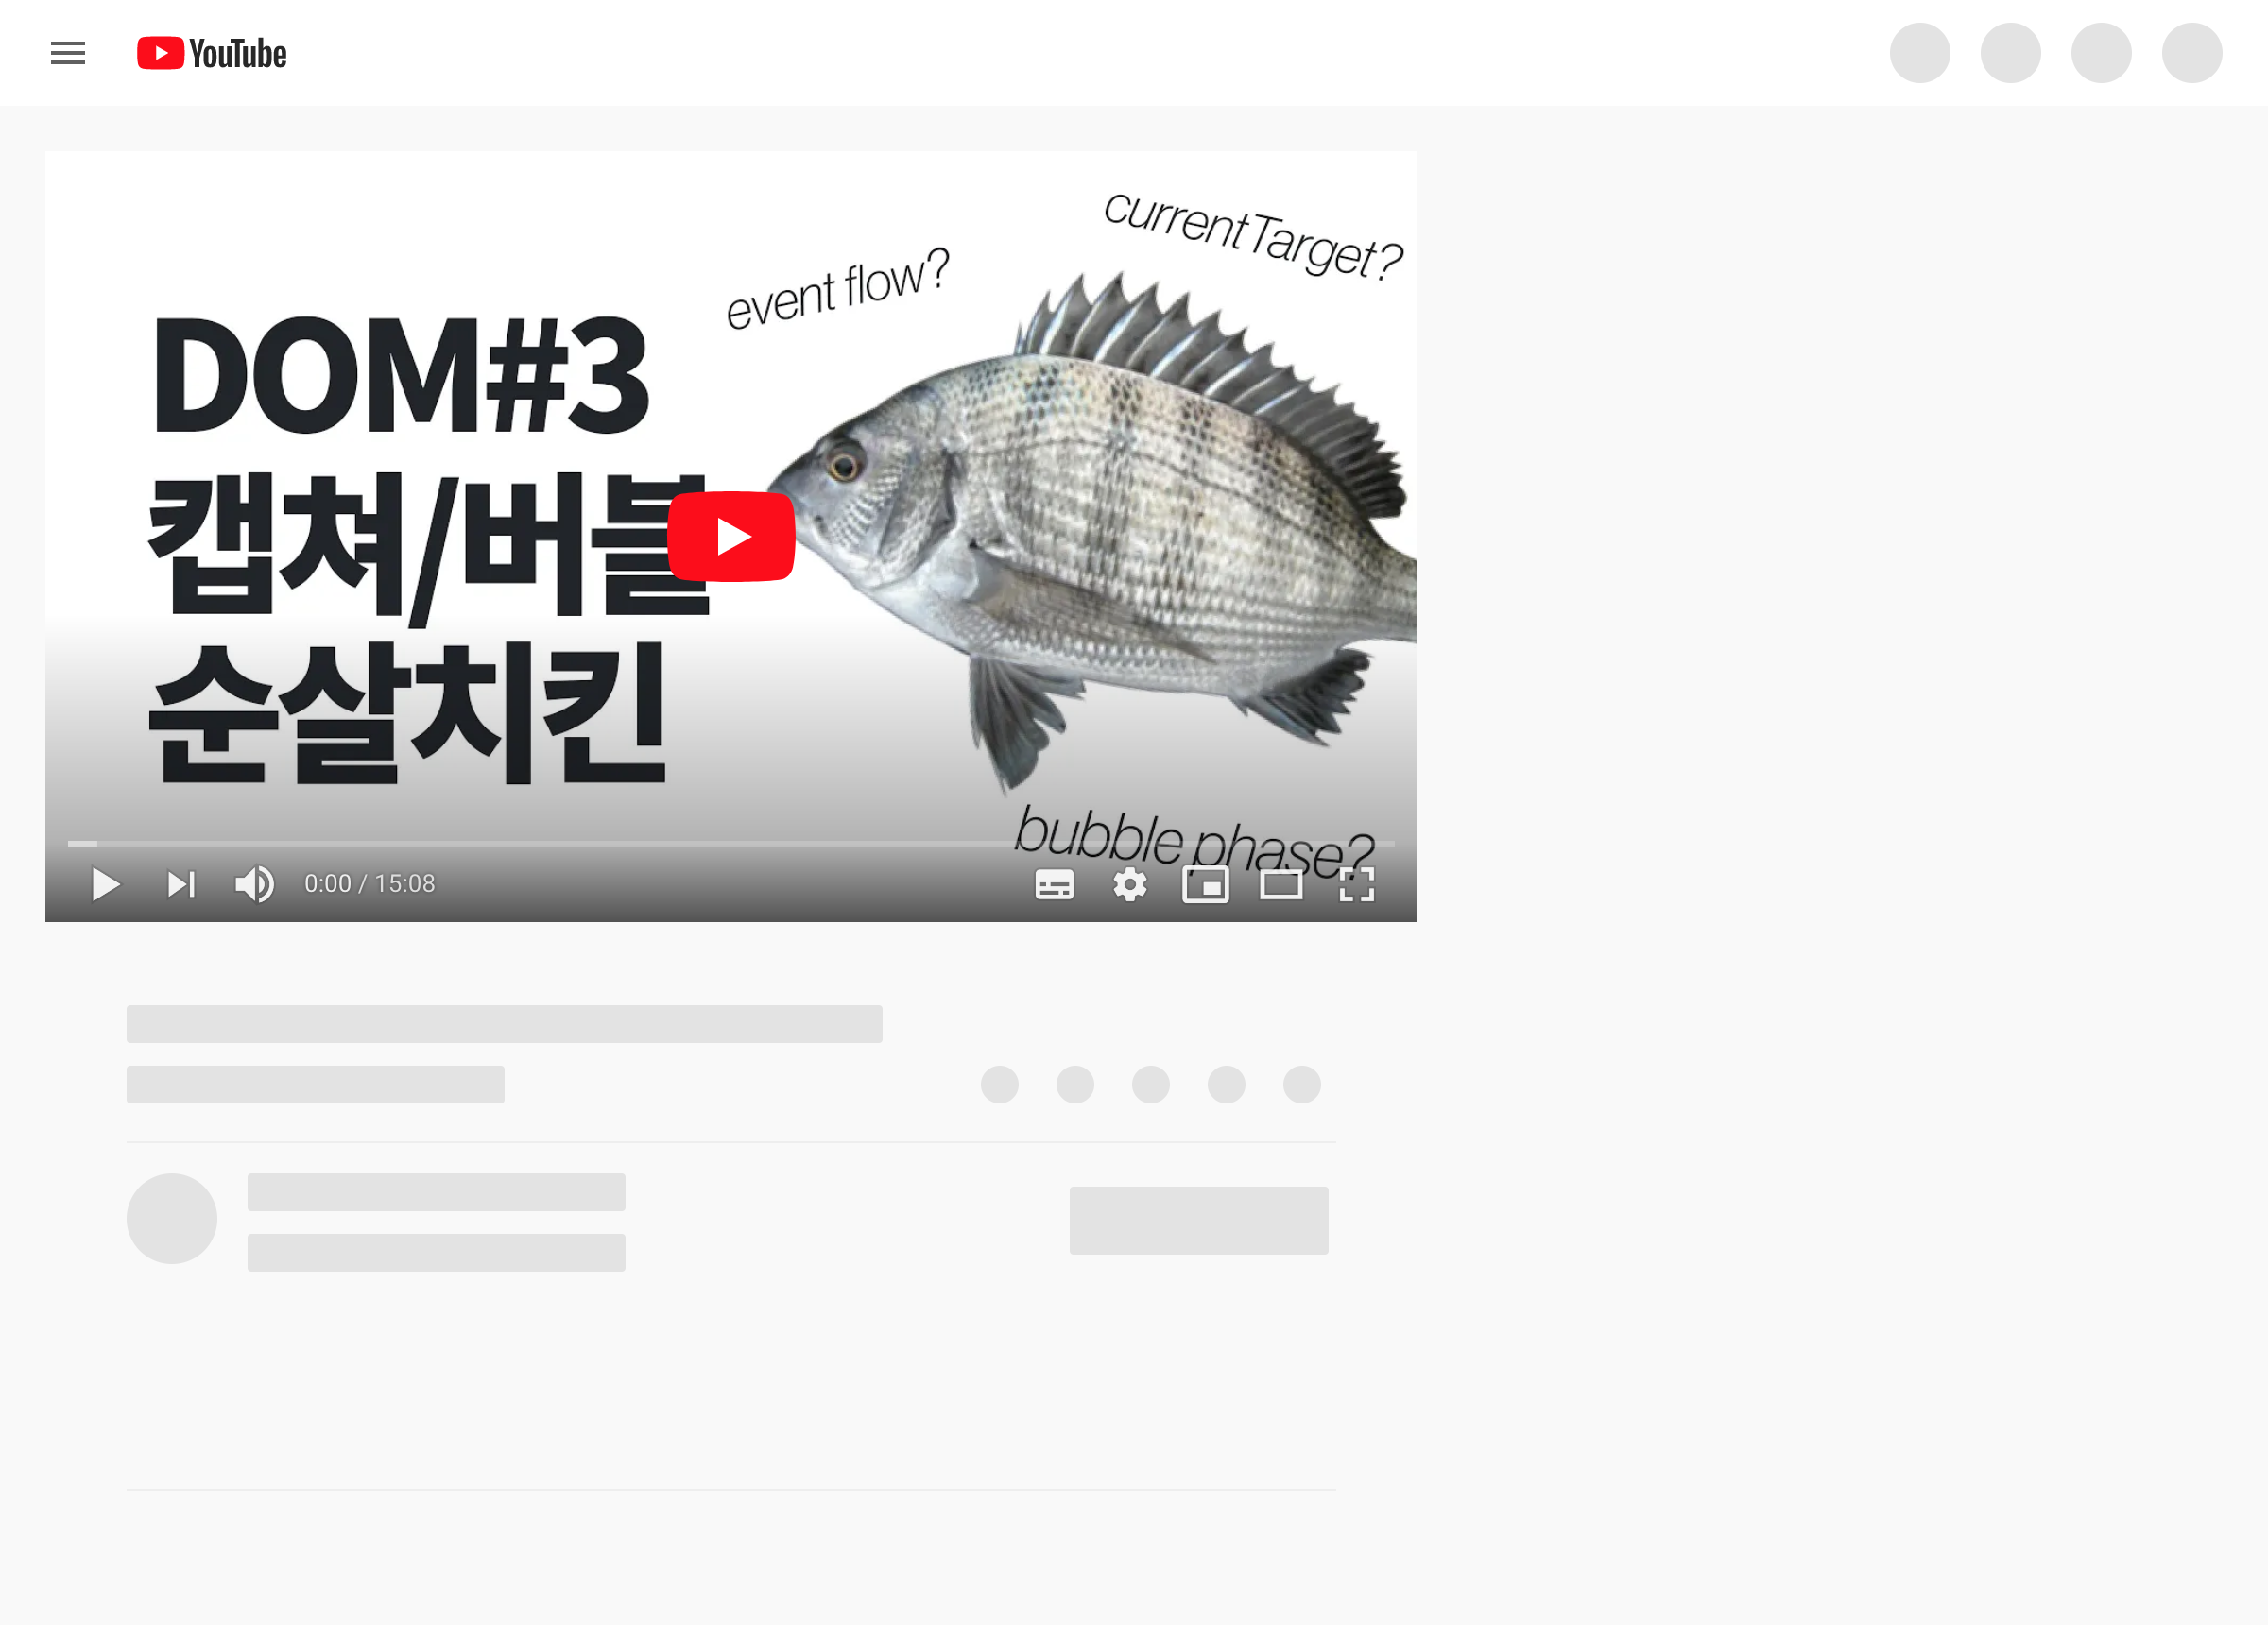

In [21]:
pil_img = pil.open("datas/screenshot.png")
pil_img

In [17]:
!ls datas

(20%+20%쿠폰) 클리오 2020베스트 어워즈 ~84%.png
(동아) 초등중등고등 하이탑 과학 시리즈 선택구매.png
(신사고) 우공비 시리즈 선택구매.png
(한시적-할인) 최신간 뉴씽씽영어 전집 세트 : 세이펜버전 New SingSing English.png
(만만한책방)만만한 수학 시리즈 전4권(점이뭐야2주세요원은괴물이야분수가 뭐야).png
(북큐레이션)세계책 시리즈 1-8 전8종.png
(북큐레이션토토북)세계책 시리즈 전3종.png
1+1 물 타지 않은 리얼 사과즙(30포+30포) 애플순.png
10%할인 옥주부 생선+새우까스(생선 6팩+새우 3팩+소스 2종(9팩)+거치대).png
10%할인 하동관의 하동가곰탕 10팩.png
12월18일(금)부터 순차배송 키즈 원리셈 원리셈 세트TOP사고력 세트 단행본 세트.png
6개 페레로 포켓커피 18개입 (총 108개입).png
6년근고려홍삼정 홍삼을 통채로 스틱 10ml 100포.png
EQ의 천재들 총100종(본책82권+스티커북8권+DVD영문판 10장)세이펜호환(별매).png
KF94 국산 마스크 100매 식약처인증 의약외품 개별포장.png
KF94 국산 마스크 의약외품 식약처인증 개별포장 100매.png
NNF 여성트레이닝 3종세트(베스트+상의+하의).png
New 에코라믹 통주물 블루밍 냄비 세트 총 6종(냄비 4종+콤비팬 2종)+실리콘손.png
[2080]2080 치약 히말라야 솔트치약 120gx15개(핑5+크5+차5).png
[3M]넥스케어 블레미쉬 패치케어 111매 + 48매 추가 증정팩.png
[Aura]아우라 건조기용 드라이시트 만다린 120매.png
[ahc]AHC 프라이빗 아이크림 기획세트.png
[ahc]에이지리스 리얼 아이크림 포페이스 30ml x6개.png
[게스]22%중복 GUESS 겨울 아이템 세일전.png
[햇반]CJ 햇반 210g 36개 (1박스).png
[콜핑]FW_겨울 세일 다운패딩기모티바지등산화모자.png
[네파][네파] 남여 프리미아 스트레치 벤치다운자켓 (7G7202

## 2. 특정 영역의 엘리먼트 좌표값 구하기

In [23]:
driver = webdriver.Chrome()
driver.get(url)

In [24]:
element = driver.find_element_by_css_selector("#movie_player")
location = element.location
size = element.size
print(location, size)
driver.quit()

{'x': 24, 'y': 80} {'height': 408, 'width': 726}


In [12]:
# area 변경 : 해상도에 따라서 비율이 달라지기 때문에 비율을 맞춰 줘야 합니다.
left = location["x"] *2
top = location["y"] *2
right = left + size["width"] *2
bottom = top + size["height"] *2
area = (left, top, right, bottom)
area

(48, 160, 1500, 976)

## 3. 이미지를 pillow로 잘라주기

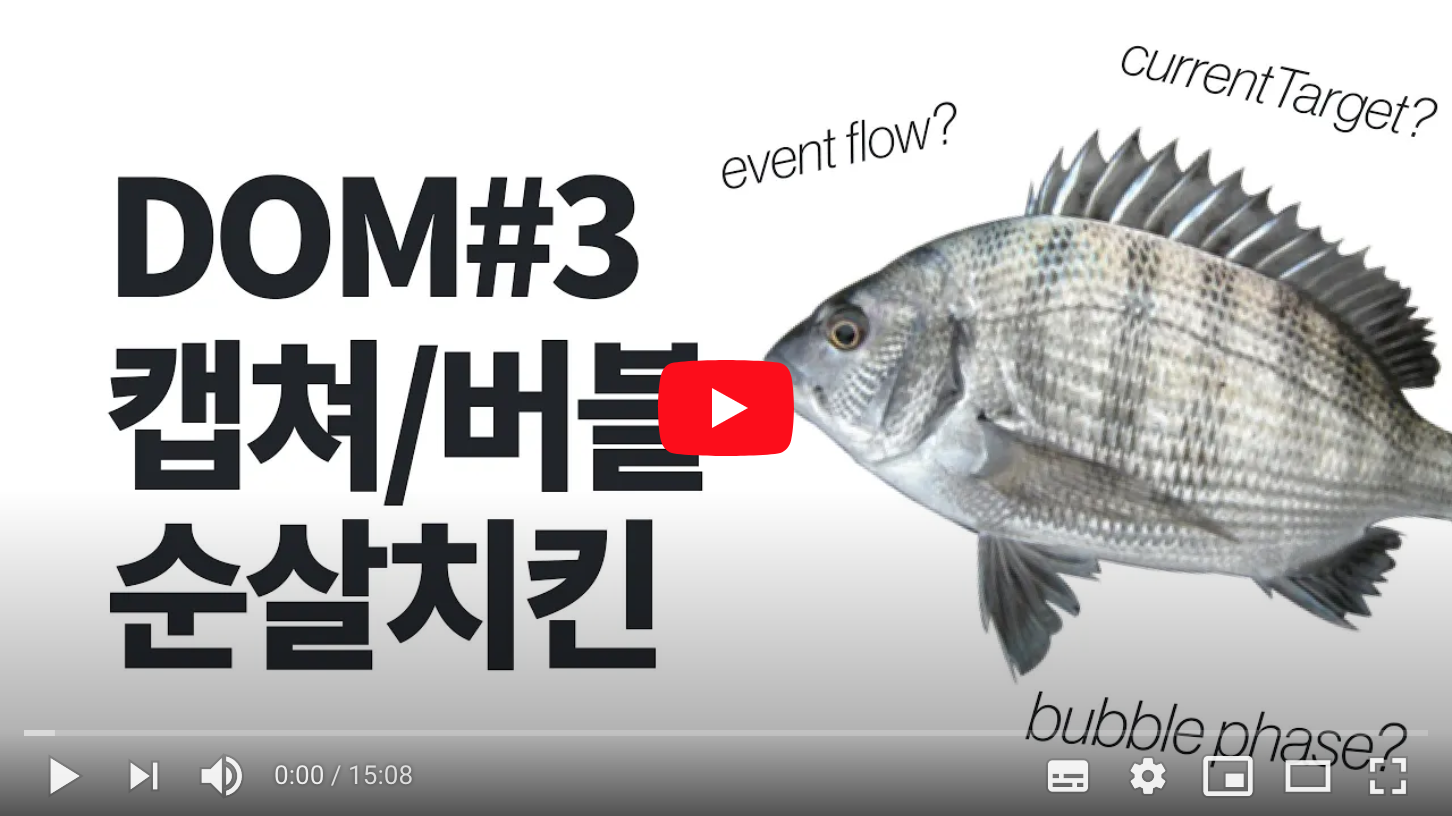

In [25]:
pil_element_img = pil_img.crop(area)
pil_element_img

In [27]:
# 이미지 저장
pil_element_img.save("datas/screenshot_element.png")

In [28]:
%ls datas

(20%+20%쿠폰) 클리오 2020베스트 어워즈 ~84%.png
(동아) 초등중등고등 하이탑 과학 시리즈 선택구매.png
(신사고) 우공비 시리즈 선택구매.png
(한시적-할인) 최신간 뉴씽씽영어 전집 세트 : 세이펜버전 New SingSing English.png
(만만한책방)만만한 수학 시리즈 전4권(점이뭐야2주세요원은괴물이야분수가 뭐야).png
(북큐레이션)세계책 시리즈 1-8 전8종.png
(북큐레이션토토북)세계책 시리즈 전3종.png
1+1 물 타지 않은 리얼 사과즙(30포+30포) 애플순.png
10%할인 옥주부 생선+새우까스(생선 6팩+새우 3팩+소스 2종(9팩)+거치대).png
10%할인 하동관의 하동가곰탕 10팩.png
12월18일(금)부터 순차배송 키즈 원리셈 원리셈 세트TOP사고력 세트 단행본 세트.png
6개 페레로 포켓커피 18개입 (총 108개입).png
6년근고려홍삼정 홍삼을 통채로 스틱 10ml 100포.png
EQ의 천재들 총100종(본책82권+스티커북8권+DVD영문판 10장)세이펜호환(별매).png
KF94 국산 마스크 100매 식약처인증 의약외품 개별포장.png
KF94 국산 마스크 의약외품 식약처인증 개별포장 100매.png
NNF 여성트레이닝 3종세트(베스트+상의+하의).png
New 에코라믹 통주물 블루밍 냄비 세트 총 6종(냄비 4종+콤비팬 2종)+실리콘손.png
[2080]2080 치약 히말라야 솔트치약 120gx15개(핑5+크5+차5).png
[3M]넥스케어 블레미쉬 패치케어 111매 + 48매 추가 증정팩.png
[Aura]아우라 건조기용 드라이시트 만다린 120매.png
[ahc]AHC 프라이빗 아이크림 기획세트.png
[ahc]에이지리스 리얼 아이크림 포페이스 30ml x6개.png
[게스]22%중복 GUESS 겨울 아이템 세일전.png
[햇반]CJ 햇반 210g 36개 (1박스).png
[콜핑]FW_겨울 세일 다운패딩기모티바지등산화모자.png
[네파][네파] 남여 프리미아 스트레치 벤치다운자켓 (7G7202

# 썸네일 만들기\
     - 원본 이미지를 다양한 사이즈로 축소하는 방법


(285, 160)


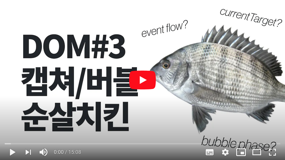

In [30]:
pil_element_img.thumbnail((320,160))
print (pil_element_img.size)
pil_element_img

## fake useragent

In [32]:
from fake_useragent import UserAgent

In [36]:
# 크롬 드라이버의 Agent 확인
driver = webdriver.Chrome()
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)

Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36


In [55]:
UserAgent().chrome

'Mozilla/5.0 (X11; Ubuntu; Linux i686 on x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2820.59 Safari/537.36'

In [56]:
# user agent 설정
options = webdriver.ChromeOptions()
options.add_argument("user-agent={}".format(UserAgent().chrome))
driver = webdriver.Chrome(options=options)
agent = driver.execute_script("return navigator.userAgent;")
driver.quit()
print(agent)

Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36


## Headless
- 브라우저를 화면에 띄우지 않고 메모리상에서만 실행
- 크롬 60버전 이상에서만 사용 가능
- window 화면이 지원되지 않는 환경에서 사용

In [57]:
options = webdriver.ChromeOptions()
options.add_argument("headless")
driver = webdriver.Chrome(options=options)
driver.get("https://fastcampus.co.kr/")
print(driver.title)
driver.quit()

커리어 성장을 위한 최고의 실무교육 아카데미 | 패스트캠퍼스


# 영상 파일 다운로드

- youtube 앞에 ss 붙여

In [70]:
def download(title, link):
    response = requests.get(link, stream=True)
    save_path, size = "datas/{}".format(title), 0
    with open(save_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                size += 1024
                f.write(chunk)
    return size

In [59]:
url

'https://www.youtube.com/watch?v=7gKtNC3b_S8&ab_channel=%EA%B9%80%EB%B2%84%EA%B7%B8Kimbug'

In [72]:
link = "https://r4---sn-oxuvgo-n8ve.googlevideo.com/videoplayback?expire=1608909351&ei=x63lX6WDI4r2WdXqtMgE&ip=185.132.242.89&id=o-AAkkG34aGn2xZx4p38bnXSoN24JUneKhqDPDguINADCJ&itag=22&source=youtube&requiressl=yes&mh=wc&mm=31%2C29&mn=sn-oxuvgo-n8ve%2Csn-n8v7znsk&ms=au%2Crdu&mv=m&mvi=4&pcm2cms=yes&pl=22&initcwndbps=1710000&vprv=1&mime=video%2Fmp4&ns=T3qN1GmP_TeEmvrEMJmsSwwF&ratebypass=yes&dur=908.573&lmt=1608647816920976&mt=1608887314&fvip=13&c=WEB&txp=6316222&n=xPdBfmD3hJMIkVsm&sparams=expire%2Cei%2Cip%2Cid%2Citag%2Csource%2Crequiressl%2Cvprv%2Cmime%2Cns%2Cratebypass%2Cdur%2Clmt&sig=AOq0QJ8wRgIhAP_OiANLHUJQK6JWNvWONJhiU7V_m_xWSF9v1JU4O5QIAiEA65JNZfFD2dHFzy_e6nsoM0sfMOIDAiVZmu-tJ-KMaSs%3D&lsparams=mh%2Cmm%2Cmn%2Cms%2Cmv%2Cmvi%2Cpcm2cms%2Cpl%2Cinitcwndbps&lsig=AG3C_xAwRgIhAJ6yMndT9O6BRSFdcvZm-ZFRlXskAKeStI_a39l6xOTBAiEAhjXphik4enx6T3wlxH23W3wXe3dLxhojZgaHFuaiHUk%3D&title=DOM%20%EC%9D%B4%EB%B2%A4%ED%8A%B8%20%ED%94%8C%EB%A1%9C%EC%9A%B0%20%EC%99%84%EB%B2%BD%ED%95%98%EA%B2%8C%20%EC%A0%95%EB%A6%AC%ED%95%B4%EB%93%9C%EB%A6%BD%EB%8B%88%EB%8B%A4.%20%23%EC%BA%A1%EC%B3%90%EB%83%90%EB%B2%84%EB%B8%94%EC%9D%B4%EB%83%90%20%23%ED%94%84%EB%A1%A0%ED%8A%B8%EC%97%94%EB%93%9C%EA%B0%9C%EB%B0%9C%EA%B8%B0%EC%B4%88"

In [73]:
title = "DOM.mp4"
size = download(title, link)
print (" {} MB".format(round(size / 1024 / 1024, 2)))

 31.81 MB


In [66]:
size